In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split
import torch.optim as optim



In [3]:
batch_size = 32
validation_split = 0.1
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [4]:
train_data = torchvision.datasets.CIFAR10(root='/Users/drake.lin/Documents/cs294-82-mt', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='/Users/drake.lin/Documents/cs294-82-mt', train=False, download=True, transform=transform)
len(train_data)

Files already downloaded and verified
Files already downloaded and verified


50000

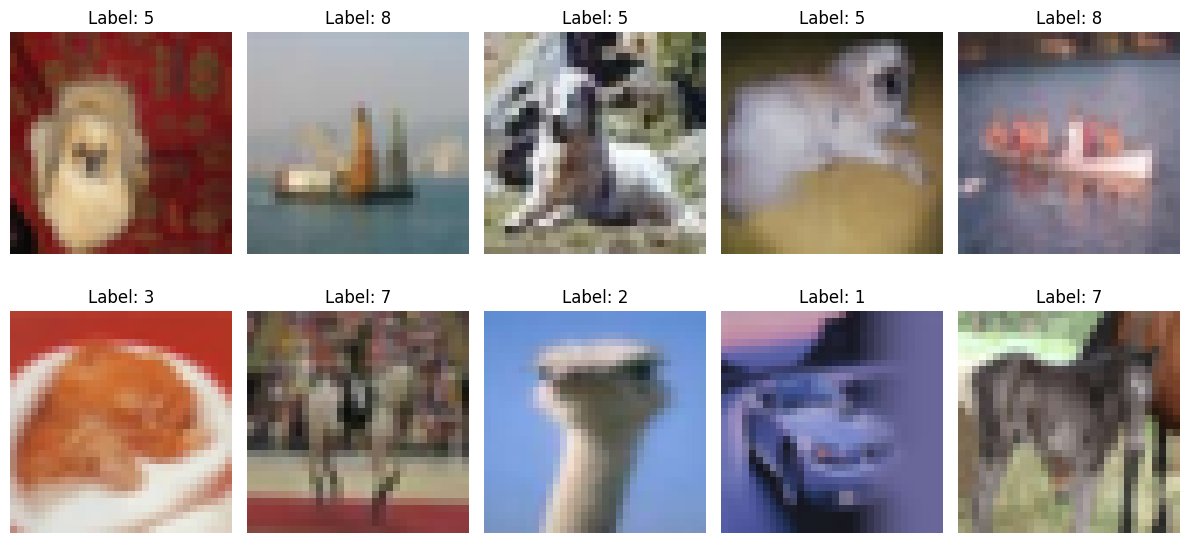

In [5]:
train_data, val_data = random_split(train_data, [int(len(train_data) * (1 - validation_split)), int(len(train_data) * validation_split)])
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)

import matplotlib.pyplot as plt

# Iterate over the train_loader and display some images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, (images, labels) in enumerate(train_loader):
    if i >= 10:
        break
    ax = axes[i // 5, i % 5]
    ax.imshow(images[0].permute(1, 2, 0)/2+0.5)
    ax.set_title(f"Label: {labels[0]}")
    ax.axis('off')

plt.tight_layout()
plt.show()



In [7]:
def train_model(model,num_epochs = 5):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    
    for epoch in range(num_epochs):
        train_loss = 0.0
        val_loss = 0.0
        correct = 0
        total = 0

        # Training loop
        model.train()
        for images, labels in train_loader:
            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # Validation loop
        model.eval()
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        accuracy = correct / total

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Accuracy: {accuracy:.2%}")

    print("Training finished.")
    return model

In [8]:
def test_model(model):
    model.eval()  # Set the model to evaluation mode

    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_data:
            outputs = model(images.unsqueeze(0))
            _, predicted = torch.max(outputs.data, 1)
            total += 1
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Accuracy on the test set: {accuracy:.2%}")
    print(f"Number of parameters in the model: {sum(p.numel() for p in model.parameters())}")


1 layer CNN

In [17]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16*16*16, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

# Create an instance of the CNN model
CNN = train_model(CNN(), num_epochs=5)
test_model(CNN)

Epoch [1/5], Train Loss: 1.4409, Val Loss: 1.3003, Accuracy: 53.92%
Epoch [2/5], Train Loss: 1.2219, Val Loss: 1.1950, Accuracy: 58.28%
Epoch [3/5], Train Loss: 1.1267, Val Loss: 1.1871, Accuracy: 58.32%
Epoch [4/5], Train Loss: 1.0568, Val Loss: 1.1195, Accuracy: 60.86%
Epoch [5/5], Train Loss: 1.0008, Val Loss: 1.0832, Accuracy: 62.26%
Training finished.
Accuracy on the test set: 62.47%
Number of parameters in the model: 41418


2 layer CNN

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 8 * 8, 120) 
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

# Create an instance of the CNN model
model = train_model(CNN(), num_epochs=5)
test_model(model)

Epoch [1/5], Train Loss: 1.4892, Val Loss: 1.2952, Accuracy: 54.08%
Epoch [2/5], Train Loss: 1.2019, Val Loss: 1.1728, Accuracy: 58.26%
Epoch [3/5], Train Loss: 1.0900, Val Loss: 1.0918, Accuracy: 61.66%
Epoch [4/5], Train Loss: 1.0031, Val Loss: 1.0514, Accuracy: 63.26%
Epoch [5/5], Train Loss: 0.9422, Val Loss: 1.0454, Accuracy: 64.08%
Training finished.
Accuracy on the test set: 63.48%
Number of parameters in the model: 125258


3 CNNs

In [9]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = nn.Linear(128 * 4 * 4, 120)  # Adjusted based on the output size of the pooling layer
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        return x

# Create an instance of the CNN model
model = train_model(CNN(), num_epochs=5)
test_model(model)

Epoch [1/5], Train Loss: 1.3877, Val Loss: 1.1179, Accuracy: 61.36%
Epoch [2/5], Train Loss: 0.9634, Val Loss: 0.9315, Accuracy: 67.86%
Epoch [3/5], Train Loss: 0.7833, Val Loss: 0.8220, Accuracy: 71.60%
Epoch [4/5], Train Loss: 0.6550, Val Loss: 0.7738, Accuracy: 73.66%
Epoch [5/5], Train Loss: 0.5587, Val Loss: 0.7522, Accuracy: 74.10%
Training finished.
Accuracy on the test set: 75.02%
Number of parameters in the model: 340338


### Theoretical number of parameters needed: 
1) 4 possibilities for color: 600 bits

In [30]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 8 * 8, 10) 

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

# Create an instance of the CNN model
model = train_model(CNN(), num_epochs=5)
test_model(model)

Epoch [1/5], Train Loss: 1.5474, Val Loss: 1.3454, Accuracy: 53.36%
Epoch [2/5], Train Loss: 1.2564, Val Loss: 1.2381, Accuracy: 57.06%
Epoch [3/5], Train Loss: 1.1643, Val Loss: 1.1967, Accuracy: 58.06%
Epoch [4/5], Train Loss: 1.1120, Val Loss: 1.1633, Accuracy: 59.50%
Epoch [5/5], Train Loss: 1.0674, Val Loss: 1.1334, Accuracy: 59.98%
Training finished.
Accuracy on the test set: 61.68%
Number of parameters in the model: 11298
